In [221]:
import pandas as pd

In [222]:
df = pd.read_excel(r"C:\Users\artem\OneDrive\Рабочий стол\Лист Microsoft Excel.xlsx", usecols="N", header=None)
df = df[0:100]

In [223]:
print(df)


       13
0  -27.26
1  -27.16
2  -18.05
3  -17.43
4  -16.02
..    ...
95  16.19
96  20.59
97  21.94
98  24.02
99  26.90

[100 rows x 1 columns]


In [224]:
df.describe()
df.columns = ["Отклонение"]
df

,Отклонение
0,-27.26
1,-27.16
2,-18.05
3,-17.43
4,-16.02
...,...
95,16.19
96,20.59
97,21.94
98,24.02


In [225]:
# l - Лист отклонений для следующих манипуляций
l = df["Отклонение"].to_list
print(l) 

<bound method IndexOpsMixin.tolist of 0    -27.26
1    -27.16
2    -18.05
3    -17.43
4    -16.02
      ...  
95    16.19
96    20.59
97    21.94
98    24.02
99    26.90
Name: Отклонение, Length: 100, dtype: float64>


In [226]:
# R - Размах
# interval_widht - ширина интервала

R = df['Отклонение'].max() - df["Отклонение"].min()
interval_widht = R/12
print("R = ", R, '. Интервал = ', interval_widht)

R =  54.16 . Интервал =  4.513333333333333


In [227]:
values = df['Отклонение']

min_val = values.min()
max_val = values.max()
num_intervals = 12

# bins - контейнеры интервалов
bins = [min_val + i * interval_widht for i in range(num_intervals + 1)]
print(bins)

# frequencies - частоты
frequencies = []

# midpoints - средние значения в интервалах
midpoints = []

# interval_labels - названия границ интервалов
interval_labels = []

# relative_freqs = частотность
relative_freqs = []
total = 100

# borders - границы интервалов
borders = []


for i in range(12):
    left = bins[i]
    right = bins[i+1]
    borders.append(left)
    
    # count - сумма значений отклонений в интервале
    count = ((values.round(2) >= left) & (values.round(2) <= right)).sum()

    # midpoint - медиана интервала
    midpoint = (left + right) / 2
    
    # rel_freq - частотность в интервале
    rel_freq = round(count / total, 2)
    
    frequencies.append(count)
    midpoints.append(round(midpoint, 2))
    interval_labels.append(f"{round(left, 3)} : {round(right, 3)}")
    relative_freqs.append(rel_freq)
borders.append(right) 
result = pd.DataFrame({
    "№ интервала": range(1, num_intervals + 1),
    "Границы интервалов": interval_labels,
    "Частота в интервале": frequencies,
    "Частотность в интервале": relative_freqs,
    "Середина интервала": midpoints
})

print(result)
    

[np.float64(-27.26), np.float64(-22.74666666666667), np.float64(-18.233333333333334), np.float64(-13.720000000000002), np.float64(-9.20666666666667), np.float64(-4.693333333333339), np.float64(-0.18000000000000327), np.float64(4.333333333333329), np.float64(8.84666666666666), np.float64(13.359999999999996), np.float64(17.873333333333324), np.float64(22.38666666666666), np.float64(26.899999999999995)]
    № интервала Границы интервалов  Частота в интервале  \
0             1   -27.26 : -22.747                    2   
1             2  -22.747 : -18.233                    0   
2             3   -18.233 : -13.72                    8   
3             4    -13.72 : -9.207                    6   
4             5    -9.207 : -4.693                   19   
5             6     -4.693 : -0.18                   14   
6             7      -0.18 : 4.333                   14   
7             8      4.333 : 8.847                   22   
8             9      8.847 : 13.36                    6   
9     

In [228]:
result.to_excel('result1.xlsx')

In [229]:
import matplotlib.pyplot as plt

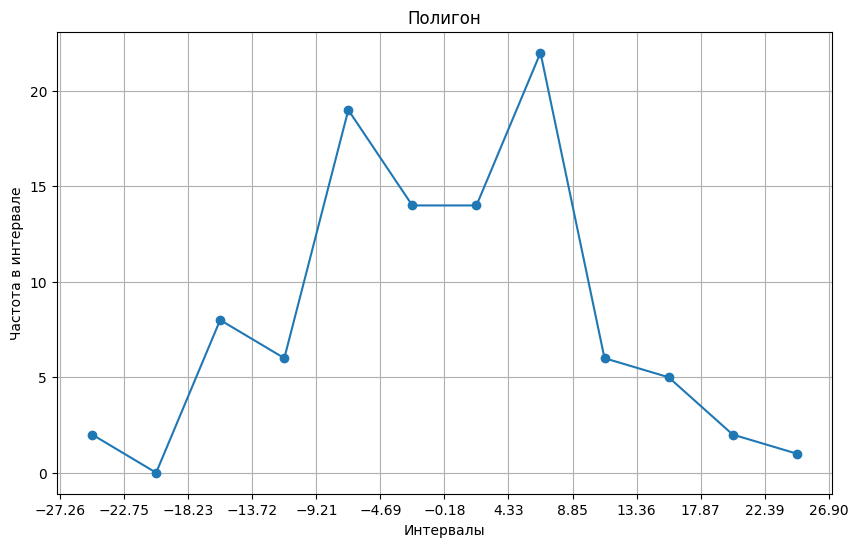

In [230]:
x = result['Середина интервала']
y = result['Частота в интервале']

plt.figure(figsize=(10,6))
plt.plot(x,y,'o-')
plt.xticks(borders)
plt.title('Полигон')
plt.xlabel('Интервалы')
plt.ylabel('Частота в интервале')
plt.grid()
plt.show()


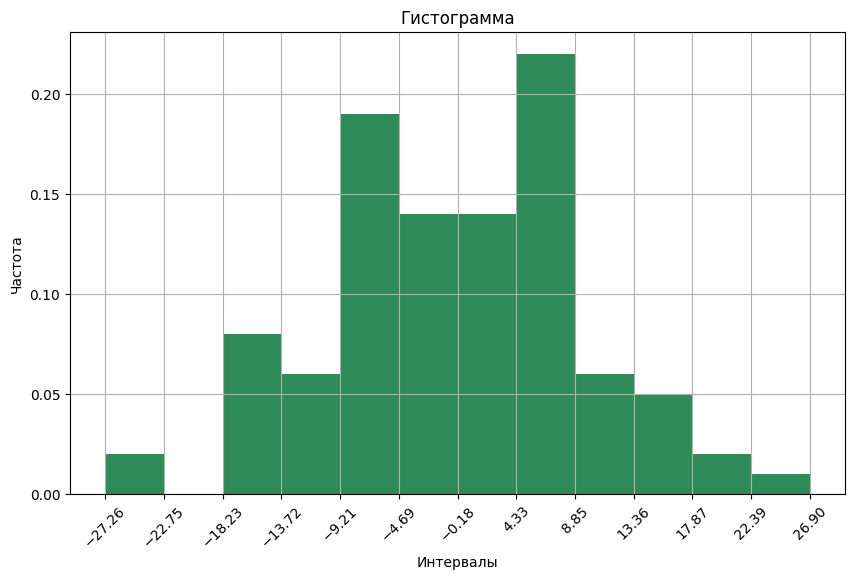

In [231]:
x = borders[:-1]  # 12 значений — левые границы
width = borders[1] - borders[0]  # если ширина одинакова
y = result['Частотность в интервале']
plt.figure(figsize=(10, 6))
plt.bar(x, y, width=width, align='edge', color='seagreen')

plt.title('Гистограмма')
plt.xticks(borders, rotation=45)
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.grid()
plt.show()

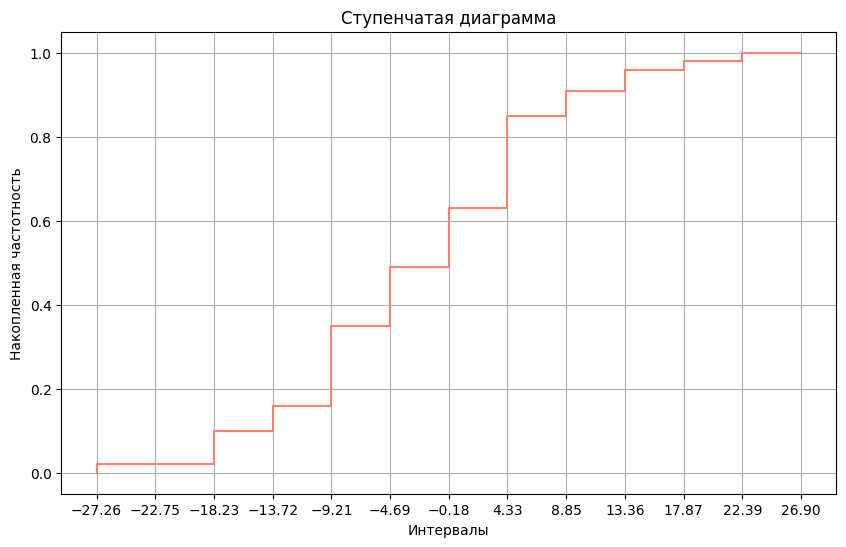

In [232]:
width = borders[1] - borders[0]

result['Накопление'] = result['Частотность в интервале'].cumsum()

import numpy as np

y = np.insert(result['Накопление'].values, 0, 0)
y[-1] = 1
plt.figure(figsize=(10,6))
plt.xticks(borders)
plt.title('Ступенчатая диаграмма')
plt.xlabel('Интервалы')
plt.ylabel('Накопленная частотность')
plt.step(borders,y, where='pre', color='salmon')
plt.grid()


### Точечная оценка характеристик распределения по сгруппированным данным


In [233]:
# X_i - лист середин интервалов
# x_i - середина интервала
X_i = result['Середина интервала'].to_list()
l = len(X_i)
print("X_i: ", X_i)

# V_i - лист частот в интервалах
# v_i - частота в интервале
V_i = result['Частота в интервале']
print("V_i :", V_i)

# n - число элементов в выборке
n = len(df)


# sum_x_i_v_i - сумма произведений середин интервалов и частот в интервалах
sum_x_i_v_i = 0

for x_i, v_i in zip(X_i, V_i):
    
    sum_x_i_v_i += x_i*v_i

x_avg = sum_x_i_v_i/n
print("X avg = ", round(x_avg, 6))

X_i:  [-25.0, -20.49, -15.98, -11.46, -6.95, -2.44, 2.08, 6.59, 11.1, 15.62, 20.13, 24.64]
V_i : 0      2
1      0
2      8
3      6
4     19
5     14
6     14
7     22
8      6
9      5
10     2
11     1
Name: Частота в интервале, dtype: int64
X avg =  -0.2911


In [234]:
# Рассчет моды M_0

# max_interv_mid - середина самого многочисленного интервала (таблица pandas)

max_interv_mid = result.loc[result['Частота в интервале'] == result['Частота в интервале'].max()]

M_0 = pd.to_numeric(max_interv_mid['Середина интервала']).iloc[0]
print("M_0 = ", M_0)

M_0 =  6.59


In [235]:
# Эмпирическая оценка десперсии и среднеквадратического отклонения
import math as mt
sum_x_i_22_v_i_x_22 = 0
for x_i, v_i in zip(X_i, V_i):
    sum_x_i_22_v_i_x_22 += ( (x_i**2)* v_i )- x_avg**2
    
# s_2 - дисперсия
s_2 = (1/n) * sum_x_i_22_v_i_x_22
print("s_2 = ", round(s_2, 4))

# s - среднеквадратическое отклонение
s = mt.sqrt(s_2)
print("s = ", round(s,4))


s_2 =  94.7369
s =  9.7333


In [236]:

# Расчет несмещенной поправки и оценки Шеппарда

# s_2_Shepard - несмещенная оценка Шепарда
s_2_Shepard = s_2 - (interval_widht**2)/12
print("s_2_Shepard = ", round(s_2, 4))



s_2_Shepard =  94.7369


In [237]:
# Вычисления моментов по методу "Ложный нуль"

# c - "ложный нуль"
c = M_0

# Y_i - Лист относительных середин интервалов
Y_i = []

# y_i - относительная середина интервала

for i, x_i in enumerate(X_i):
    y_i = (x_i - c)/interval_widht
    Y_i.append(y_i)
print("Y_i = ", Y_i)

Y_i =  [np.float64(-6.999261447562778), np.float64(-6.0), np.float64(-5.000738552437224), np.float64(-3.9992614475627777), np.float64(-3.0), np.float64(-2.000738552437223), np.float64(-0.999261447562777), np.float64(0.0), np.float64(0.999261447562777), np.float64(2.000738552437223), np.float64(3.0), np.float64(3.9992614475627777)]


In [238]:
# V_i — список частот в интервалах по 12 интервалам
# Y_i — список относительных середин этих интервалов


# H_i — список начальных моментов
H_i = []

for i in range(l):
    
    # sum_v_i_y_j_i — сумма для каждого момента
    sum_v_i_y_j_i = 0
    for v_i, y_j in zip(V_i, Y_i):
        sum_v_i_y_j_i += (v_i) * (y_j**(i+1))
    h_i = sum_v_i_y_j_i/n
    print(f"Начальный момент h_{i+1} = ", h_i)
    H_i.append(h_i) 
print("H_i = ", H_i)   
    
    

Начальный момент h_1 =  -1.5100147710487442
Начальный момент h_2 =  6.950236642237346
Начальный момент h_3 =  -25.45110946504301
Начальный момент h_4 =  136.18995747621963
Начальный момент h_5 =  -681.5751802546296
Начальный момент h_6 =  4054.4776811743054
Начальный момент h_7 =  -23916.725650382094
Начальный момент h_8 =  152493.2267266531
Начальный момент h_9 =  -979241.7927099451
Начальный момент h_10 =  6511812.589573874
Начальный момент h_11 =  -43652853.47382273
Начальный момент h_12 =  297325549.02614313
H_i =  [np.float64(-1.5100147710487442), np.float64(6.950236642237346), np.float64(-25.45110946504301), np.float64(136.18995747621963), np.float64(-681.5751802546296), np.float64(4054.4776811743054), np.float64(-23916.725650382094), np.float64(152493.2267266531), np.float64(-979241.7927099451), np.float64(6511812.589573874), np.float64(-43652853.47382273), np.float64(297325549.02614313)]


In [239]:
# Определение среднего арифметического x и центральных эмпирических моментов m2, m3, m4

m11 = interval_widht*H_i[0] + c
m12 = x_avg
print("m1 = ", m11)


m2 = s**2
m22 = interval_widht**2 * (H_i[1]-H_i[0]**2)
print("m2 = ", m22)

m3 = interval_widht**3 * (H_i[2] - 3 * H_i[1]*H_i[0] + 2 * H_i[0]**3)
print("m3 = ", m3)

m4 = interval_widht**4 * (H_i[3] - 4 * H_i[0]*H_i[2] + 6 * H_i[0]**2 * H_i[1] - 3 * H_i[0]**4)
print("m4 = ", m4)
 

m1 =  -0.2251999999999983
m2 =  95.13060496000001
m3 =  -78.36133416201676
m4 =  25706.55392395173


In [240]:
# Оценка ассиметрии и эксцесса

S_k = m3/s**3

E_k = (m4/s**4) - 3

print("S_k = ", S_k)
print("E_k = ", E_k)

S_k =  -0.08498128064765316
E_k =  -0.13578381362151504


### Построение доверительных интервалов

In [250]:
Y_i = [ round(elem) for elem in Y_i]
Y_i_2 = [elem**2 for elem in Y_i]
Y_i_3 = [elem**3 for elem in Y_i]
Y_i_4 = [elem**4 for elem in Y_i]
v_i_y_i = [v_i*y_i for v_i, y_i in zip(V_i, Y_i)]
v_i_y_i_2 = [v_i*(y_i**2) for v_i, y_i in zip(V_i, Y_i)]
v_i_y_i_3 = [v_i*(y_i**3) for v_i, y_i in zip(V_i, Y_i)]
v_i_y_i_4 = [v_i*(y_i**4) for v_i, y_i in zip(V_i, Y_i)]

table_4 = pd.DataFrame(
    {
    "№ интервала": list(range(1, len(Y_i) + 1)),
    "Середины интервалов": midpoints, 
    "Относ. серед. интерв. y_i": Y_i, 
    "(y_i)^2": Y_i_2,
    "(y_i)^3": Y_i_3,
    "(y_i)^4": Y_i_4,
    "Частота в интервале v_i": V_i,
    "v_i*y_i": v_i_y_i,
    "v_i*(y_i)^2": v_i_y_i_2,
    "v_i*(y_i)^3": v_i_y_i_3,
    "v_i*(y_i)^4": v_i_y_i_4,
    }
)
print(type(V_i))
print(v_i_y_i)
sum_row = {
    "№ интервала": "Суммы",
    "Середины интервалов": "", 
    "Относ. серед. интерв. y_i": "", 
    "(y_i)^2": "",
    "(y_i)^3": "",
    "(y_i)^4": "",
    "Частота в интервале v_i": V_i.sum(),
    "v_i*y_i": sum(v_i_y_i),
    "v_i*(y_i)^2": sum(v_i_y_i_2),
    "v_i*(y_i)^3": sum(v_i_y_i_3),
    "v_i*(y_i)^4": sum(v_i_y_i_4),
}


table_4.loc[len(table_4)] = sum_row

labels_row = {
    "№ интервала": "Обозначение сумм",
    "Середины интервалов": "",
    "Относ. серед. интерв. y_i": "",
    "(y_i)^2": "",
    "(y_i)^3": "",
    "(y_i)^4": "",
    "Частота в интервале v_i": "Σ0",
    "v_i*y_i": "Σ1",
    "v_i*(y_i)^2": "Σ2",
    "v_i*(y_i)^3": "Σ3",
    "v_i*(y_i)^4": "Σ4",
}

table_4.loc[len(table_4)] = labels_row
h_1 = H_i[0]
moments_row = {
    "№ интервала": "Начальные моменты в относительном выражении",
    "Середины интервалов": "",
    "Относ. серед. интерв. y_i": "",
    "(y_i)^2": "",
    "(y_i)^3": "",
    "(y_i)^4": "",
    "Частота в интервале v_i": "",
    "v_i*y_i": H_i[0],
    "v_i*(y_i)^2": H_i[1],
    "v_i*(y_i)^3": H_i[2],
    "v_i*(y_i)^4": H_i[3],
}
table_4.loc[len(table_4)] = moments_row

labels_2_row = {
    "№ интервала": "Обозначения относительных начальных моментов",
    "Середины интервалов": "",
    "Относ. серед. интерв. y_i": "",
    "(y_i)^2": "",
    "(y_i)^3": "",
    "(y_i)^4": "",
    "Частота в интервале v_i": "",
    "v_i*y_i": "h1",
    "v_i*(y_i)^2": "h2",
    "v_i*(y_i)^3": "h3",
    "v_i*(y_i)^4": "h4",
}
table_4.loc[len(table_4)] = labels_2_row

print("\nТаблица 4\n")
table_4

<class 'pandas.core.series.Series'>
[-14, 0, -40, -24, -57, -28, -14, 0, 6, 10, 6, 4]


TypeError: 'list' object is not callable

In [ ]:
# Построение таблиц для первых 20 элементов выборки

# Таблица аналог первой таблицы для первых 20 элементов выборки
n_20 = [
6.441, 3.294, 3.366, 0.654, -4.401, 
-14.09, -2.312, -8.613, 8.328, -7.679,
-3.83, 7.709, -13.57, -3.386, 3.764,
20.59, -18.05, -0.9333, 3.421, 4.396
]

table_5 = pd.DataFrame({
    "№": list(range(1, len(n_20) + 1)),
    "x_i": n_20
    })
table_5



In [ ]:
# Таблица аналог упорядоченной таблицы

n_20_sort = sorted(n_20)

table_6 = pd.DataFrame({
    "№": list(range(1, len(n_20) + 1)),
    "x_i": n_20_sort,
    "x_i^2": [elem**2 for elem in n_20_sort]
    })

table_6

In [ ]:
# Коэффициенты Стьюдента для 19 степеней свободы 

tqn_1_90 = 1.72913281152
tqn_1_95 = 2.09302405441 # берем его
tqn_1_99 = 2.86093460645
tqn_1_999 = 3.88340584948

In [ ]:

x_avg_20 = table_5["x_i"].mean()

sum_x_i_2 = 0
for x in table_5["x_i"]:
    sum_x_i_2 += x**2

    
s_20 = mt.sqrt((sum_x_i_2 / len(table_5)) - x_avg_20**2)

print(f"x_avg_20 = {x_avg_20}\ns_20 = {s_20}")

In [ ]:
# Доверительный интервал

